Basic Details for Combined Batches:
                           Metric  Value
0           Total Number of Teams   1322
1  Total Participating Institutes    600
2                    Total Cities    194
3                    Total States     29

Generating Visualizations...


C:\Users\Pavilion\AppData\Local\Temp\ipykernel_9076\3216913258.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=organization_counts.index, y=organization_counts.values, palette='viridis')


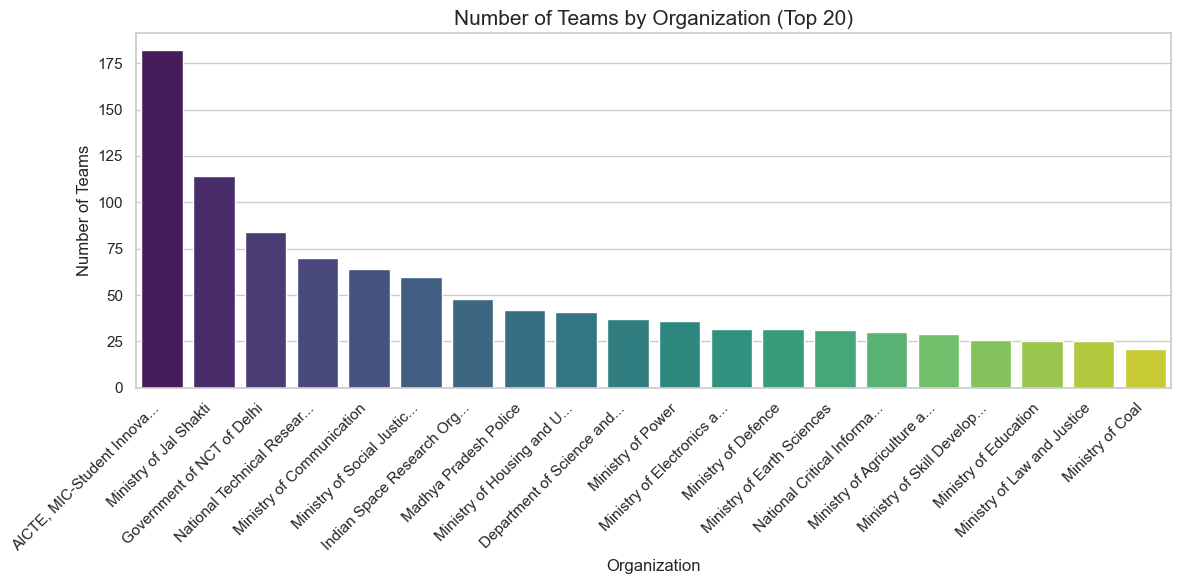

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_9076\3216913258.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='Blues_d')


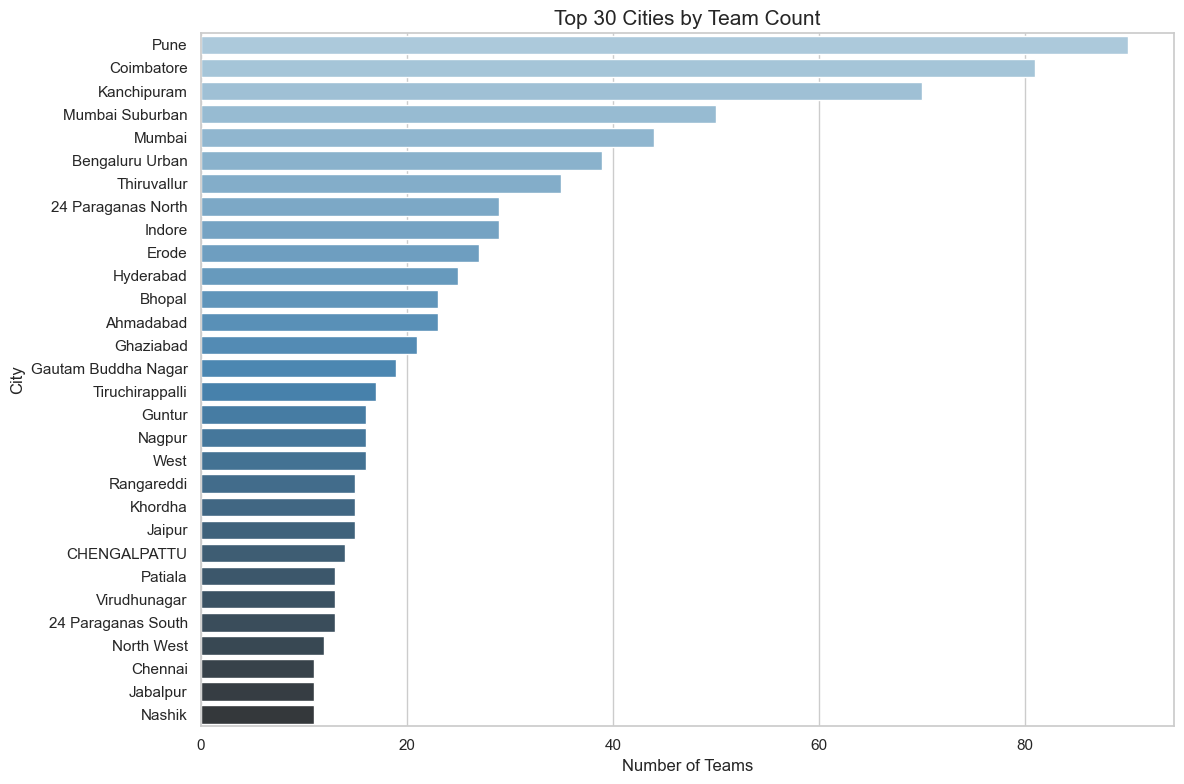

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_9076\3216913258.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ps_id_counts_grouped.index, y=ps_id_counts_grouped.values, palette='Set3')


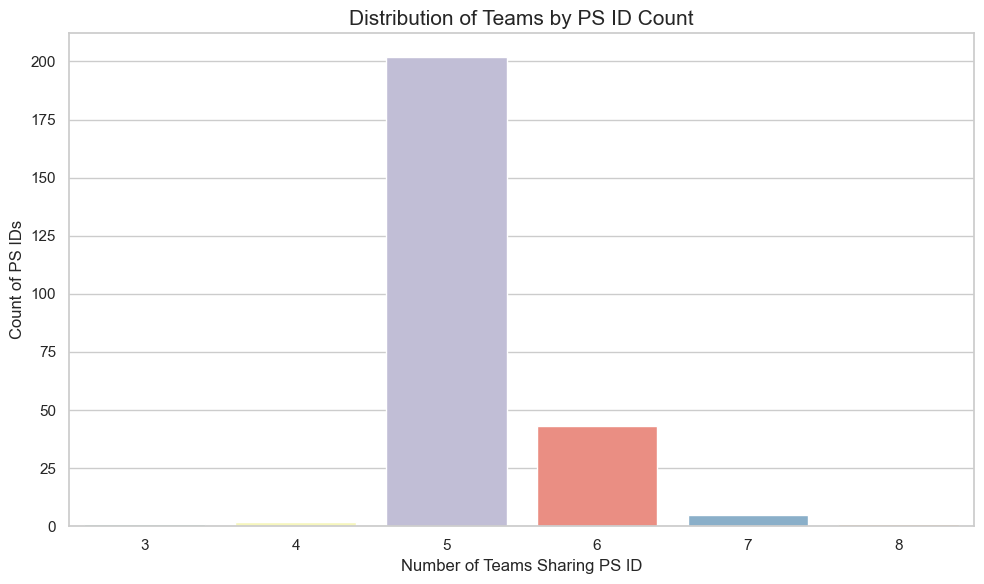

C:\Users\Pavilion\AppData\Local\Temp\ipykernel_9076\3216913258.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_selections.values, y=state_selections.index, palette='coolwarm')


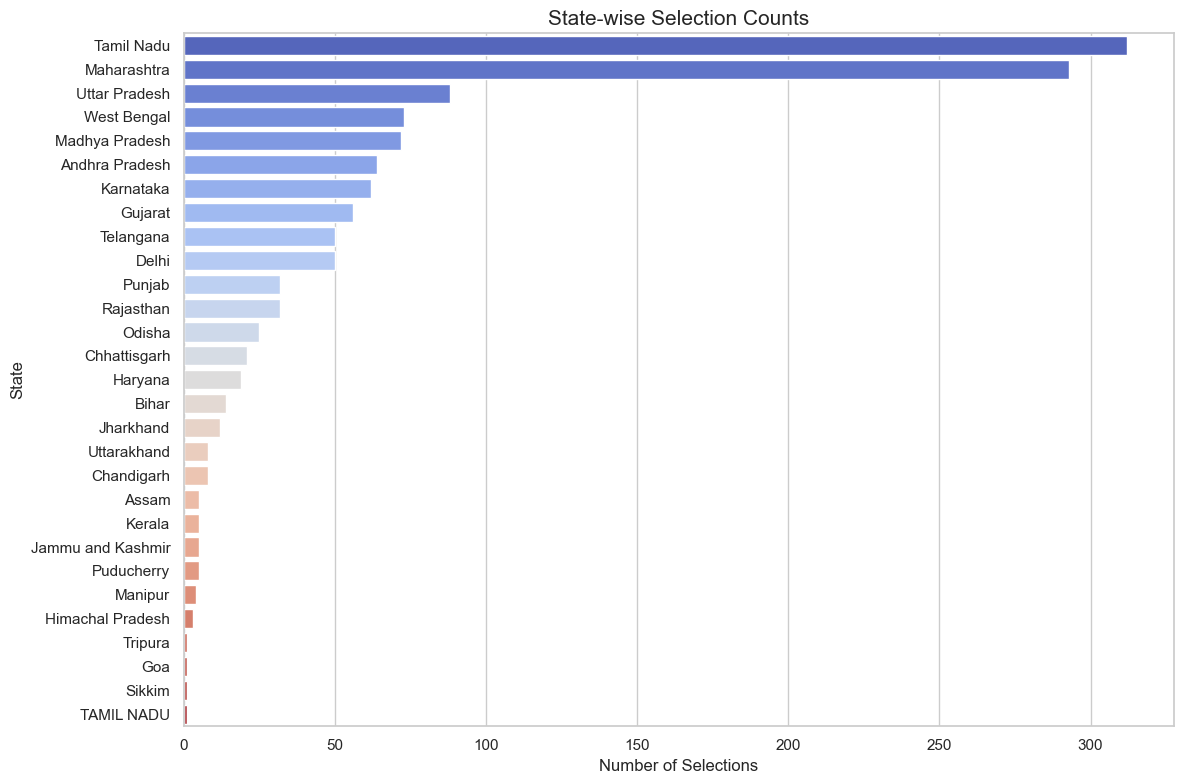

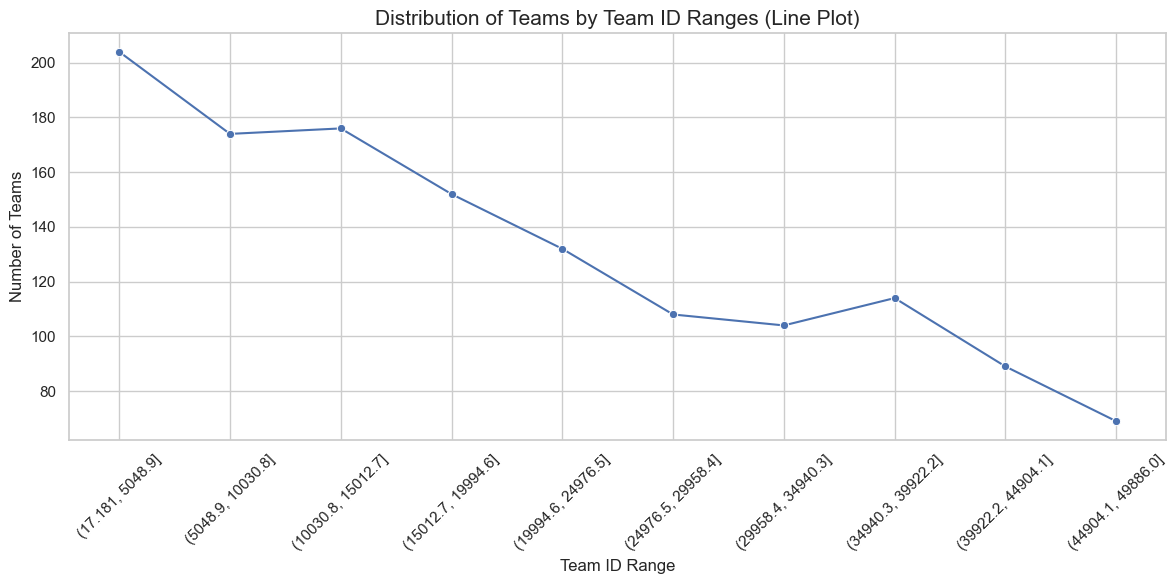

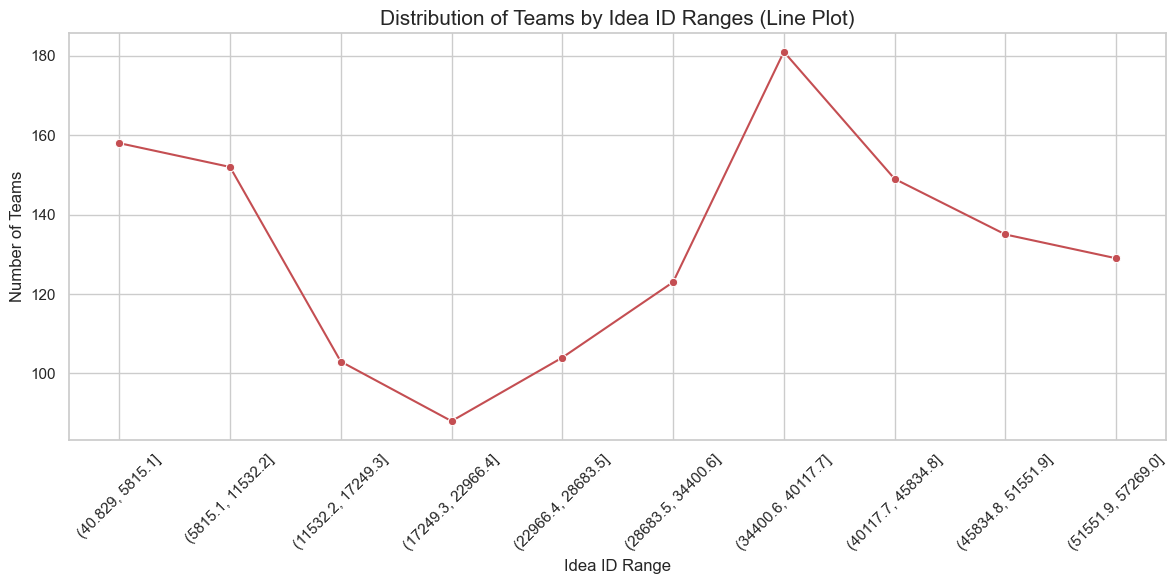

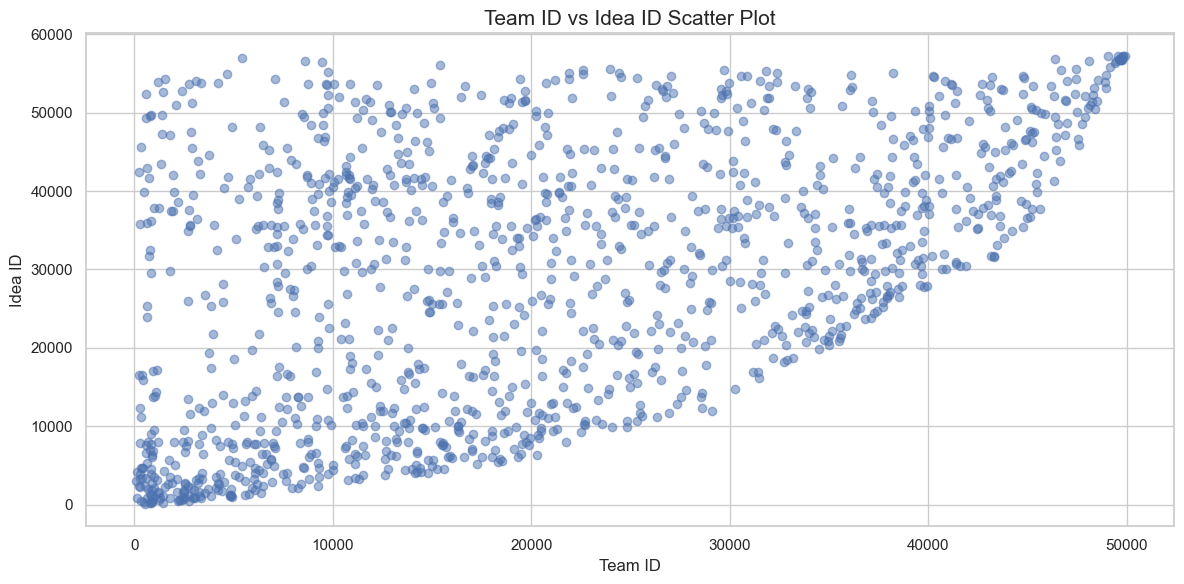

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean data function
def clean_data(batch_df):
    # Truncate long organization and institute names for readability
    batch_df['Name of the Institute'] = batch_df['Name of the Institute'].apply(lambda x: x[:30] + '...' if len(x) > 33 else x)
    batch_df['Organization'] = batch_df['Organization'].apply(lambda x: x[:25] + '...' if len(x) > 28 else x)
    
    # Remove duplicates if any
    batch_df = batch_df.drop_duplicates()
    
    # Dropping any rows with missing values in important columns
    batch_df = batch_df.dropna(subset=['Team Name', 'Name of the Institute', 'Organization'])
    
    # Add a Batch column
    batch_df['Batch'] = batch_df['PS ID'].str.split('').str[0]
    
    return batch_df

# Load the CSV files
batch_1_df = pd.read_csv('batch_1_result.csv')
batch_2_df = pd.read_csv('batch_2_result.csv')
batch_3_df = pd.read_csv('batch_3_result.csv')

# Clean the data
batch_1_df = clean_data(batch_1_df)
batch_2_df = clean_data(batch_2_df)
batch_3_df = clean_data(batch_3_df)

# Combine all batches
combined_df = pd.concat([batch_1_df, batch_2_df, batch_3_df], ignore_index=True)

# Display basic details function
def display_basic_details(batch_df):
    total_teams = batch_df.shape[0]
    total_institutes = batch_df['Name of the Institute'].nunique()
    total_cities = batch_df['City'].nunique()
    total_states = batch_df['State'].nunique()

    # Create a DataFrame for basic statistics
    stats_df = pd.DataFrame({
        'Metric': ['Total Number of Teams', 'Total Participating Institutes', 'Total Cities', 'Total States'],
        'Value': [total_teams, total_institutes, total_cities, total_states]
    })

    print(stats_df)

# Visualization Functions
def visualize_combined_data(batch_df):
    # Set plot style
    sns.set(style="whitegrid")

    # 1. Team Count by Organization (Bar Plot - Top 20 Organizations)
    plt.figure(figsize=(12, 6))
    organization_counts = batch_df['Organization'].value_counts().head(20)  # Top 20 organizations
    sns.barplot(x=organization_counts.index, y=organization_counts.values, palette='viridis')
    plt.title('Number of Teams by Organization (Top 20)', fontsize=15)
    plt.xlabel('Organization', fontsize=12)
    plt.ylabel('Number of Teams', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 2. Teams by City (Top 30 Cities by Team Count)
    city_counts = batch_df['City'].value_counts().head(30)  # Top 30 cities
    plt.figure(figsize=(12, 8))
    sns.barplot(y=city_counts.index, x=city_counts.values, palette='Blues_d')
    plt.title('Top 30 Cities by Team Count', fontsize=15)
    plt.xlabel('Number of Teams', fontsize=12)
    plt.ylabel('City', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 3. PS ID Distribution (Grouped by Count)
    ps_id_counts = batch_df['PS ID'].value_counts()
    ps_id_counts_grouped = ps_id_counts.value_counts().sort_index()  # Group by the counts of PS IDs
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ps_id_counts_grouped.index, y=ps_id_counts_grouped.values, palette='Set3')
    plt.title('Distribution of Teams by PS ID Count', fontsize=15)
    plt.xlabel('Number of Teams Sharing PS ID', fontsize=12)
    plt.ylabel('Count of PS IDs', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 4. State-wise Selection Counts (Descending Order)
    plt.figure(figsize=(12, 8))
    state_selections = batch_df['State'].value_counts().sort_values(ascending=False)
    sns.barplot(x=state_selections.values, y=state_selections.index, palette='coolwarm')
    plt.title('State-wise Selection Counts', fontsize=15)
    plt.xlabel('Number of Selections', fontsize=12)
    plt.ylabel('State', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 5. Distribution of Teams by Team ID Range (Continuous Line Plot)
    plt.figure(figsize=(12, 6))
    team_id_ranges = pd.cut(batch_df['Team ID'], bins=10)  # Group into 10 bins
    team_id_counts = team_id_ranges.value_counts().sort_index()  # Count the number of teams in each bin
    sns.lineplot(x=team_id_counts.index.astype(str), y=team_id_counts.values, marker='o', color='b')
    plt.title('Distribution of Teams by Team ID Ranges (Line Plot)', fontsize=15)
    plt.xlabel('Team ID Range', fontsize=12)
    plt.ylabel('Number of Teams', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 6. Distribution of Teams by Idea ID Range (Continuous Line Plot)
    plt.figure(figsize=(12, 6))
    idea_id_ranges = pd.cut(batch_df['Idea ID'], bins=10)  # Group into 10 bins
    idea_id_counts = idea_id_ranges.value_counts().sort_index()  # Count the number of teams in each bin
    sns.lineplot(x=idea_id_counts.index.astype(str), y=idea_id_counts.values, marker='o', color='r')
    plt.title('Distribution of Teams by Idea ID Ranges (Line Plot)', fontsize=15)
    plt.xlabel('Idea ID Range', fontsize=12)
    plt.ylabel('Number of Teams', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 7. Team ID vs Idea ID Scatter Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(batch_df['Team ID'], batch_df['Idea ID'], alpha=0.5)
    plt.title('Team ID vs Idea ID Scatter Plot', fontsize=15)
    plt.xlabel('Team ID', fontsize=12)
    plt.ylabel('Idea ID', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the functions
print("Basic Details for Combined Batches:")
display_basic_details(combined_df)

print("\nGenerating Visualizations...")
visualize_combined_data(combined_df)